In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### 데이터 읽어오기

In [2]:
# UnicodeDecodeError가 발생할 경우
# 한글이 있으면 : euc-kr
# 한글이 없으면 : ISO-8858-1
df = pd.read_csv('data10/online_retail.csv',dtype= {'CustomerID':str},encoding='ISO-8859-1')

# date 타입으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# 결측치 확인
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

가장 좋은 처리방법은 제거이나 무조건 좋다고는 할 수 없다. (학습량이 줄어들기 때문)

일단 제거 후 학습을 해보고 결과를 확인한다.

좋지 않은 결과가 나왔을때는 대체할만한 값을 구해서 넣어본다.

### 결측치 제거

In [5]:
df.dropna(inplace=True)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### 이상치 제거

In [6]:
df.describe()

# Quantity (상품 수량)에 음수가 존재한다.
# UnitPrice (상품 가격)에 0이 존재한다.

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [7]:
# 상품 수량이 음수인 데이터를 제거한다.
df = df.query('Quantity>0')
df.describe()

,Quantity,UnitPrice
count,397924.000000,397924.000000
mean,13.021823,3.116174
std,180.420210,22.096788
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [8]:
# 상품 가격이 0이하인 경우를 제거한다.
df = df.query('UnitPrice > 0')
df.describe()

,Quantity,UnitPrice
count,397884.000000,397884.000000
mean,12.988238,3.116488
std,179.331775,22.097877
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [9]:
# 상품코드
df['StockCode']

0         85123A
1          71053
2         84406B
3         84029G
4         84029E
           ...  
541904     22613
541905     22899
541906     23254
541907     23255
541908     22138
Name: StockCode, Length: 397884, dtype: object

In [10]:
# 상품 코드가 숫자로 구성되지 않은 것은 제거한다.
# 상품코드가 숫자인 것을 구해서 저장
# 숫자 판별 : .isdigit()

# 코드가 문자로 구성되어있는 것은 제외하고 저장
# any : 하나라도 True이면 True로 판정
df['ContaintDigit'] = df['StockCode'].apply(lambda x :any(c.isdigit() for c in x))

In [11]:
df = df.query('ContaintDigit == True' )
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ContaintDigit
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True


### 일자별 거래 데이터 분석

In [12]:
# 거래 데이터에서 가장 오래된 데이터와 가장 최신 데이터를 탐색한다.
# dt.date : 날짜 데이터만 출력

df['Date'] = df['InvoiceDate'].dt.date
print(df['Date'].min)
print(df['Date'].max)

<bound method Series.min of 0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: Date, Length: 396470, dtype: object>
<bound method Series.max of 0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: Date, Length: 396470, dtype: object>


In [13]:
# 일자별 총 거래 수량을 탐색한다.
date_quantity_series = df.groupby('Date')['Quantity'].sum()
date_quantity_series

Date
2010-12-01    24208
2010-12-02    31140
2010-12-03    11822
2010-12-05    16370
2010-12-06    16269
              ...  
2011-12-05    37610
2011-12-06    27798
2011-12-07    41080
2011-12-08    27536
2011-12-09    90573
Name: Quantity, Length: 305, dtype: int64

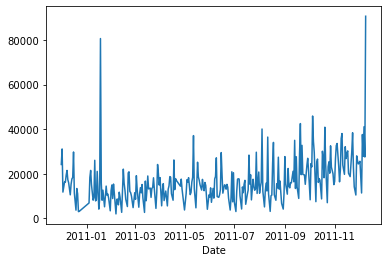

In [14]:
date_quantity_series.plot()
plt.show()

연초와 연말에 거래량이 급증한다.

In [15]:
# 일자별 총 거래 횟수를 탐색한다.
# InvocieNo가 같은 것은 하나의 거래건으로 보고 Invoice가 다른 것들의 수를 계산한다.
# nunique : 개체의 고유 요소 수를 반환, Na값은 제외

date_transaction_series = df.groupby('Date')['InvoiceNo'].nunique()
date_transaction_series

Date
2010-12-01    121
2010-12-02    136
2010-12-03     57
2010-12-05     87
2010-12-06     94
             ... 
2011-12-05    115
2011-12-06    110
2011-12-07    103
2011-12-08    113
2011-12-09     41
Name: InvoiceNo, Length: 305, dtype: int64

<AxesSubplot:xlabel='Date'>

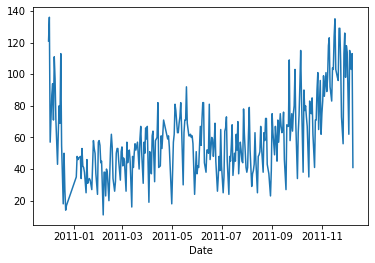

In [16]:
date_transaction_series.plot()

두 그래프를 통해 연초에는 건수는 적지만 구매수량이 많은 것을 확인

### 일자별 거래된 상품의 unique한 갯수, 즉 상품 거래 다양성

In [17]:
date_unique_item_series = df.groupby('Date')['StockCode'].nunique()
date_unique_item_series

Date
2010-12-01     939
2010-12-02     905
2010-12-03     671
2010-12-05    1140
2010-12-06     914
              ... 
2011-12-05    1405
2011-12-06    1141
2011-12-07    1044
2011-12-08    1143
2011-12-09     456
Name: StockCode, Length: 305, dtype: int64

<AxesSubplot:xlabel='Date'>

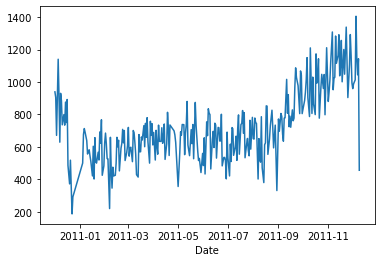

In [18]:
date_unique_item_series.plot()

### 유저별 구매 패턴 분석

In [19]:
# 총 유저수를 계산하여 출력한다.
df['CustomerID'].nunique()

4334

In [20]:
# 유저별 거래 횟수를 탐색한다.
df.groupby('CustomerID')['InvoiceNo'].nunique()

CustomerID
12346     1
12347     7
12348     4
12349     1
12350     1
         ..
18280     1
18281     1
18282     2
18283    16
18287     3
Name: InvoiceNo, Length: 4334, dtype: int64

In [21]:
# 유저별 거래 횟수를 탐색한다.
customer_unique_transaction_series = df.groupby('CustomerID')['InvoiceNo'].nunique()
customer_unique_transaction_series.describe()

count    4334.000000
mean        4.246654
std         7.642535
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       206.000000
Name: InvoiceNo, dtype: float64

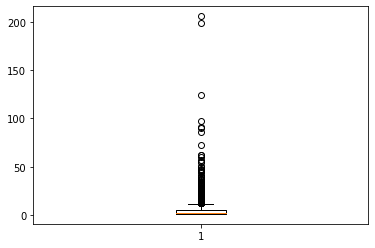

In [22]:
plt.boxplot(customer_unique_transaction_series.values)
plt.show()

In [23]:
# 유저별 아이템 구매 종류 개수를 탐색한다.
customer_unique_item_series = df.groupby('CustomerID')['StockCode'].nunique()
customer_unique_item_series.describe()

count    4334.000000
mean       61.432856
std        85.312937
min         1.000000
25%        16.000000
50%        35.000000
75%        77.000000
max      1786.000000
Name: StockCode, dtype: float64

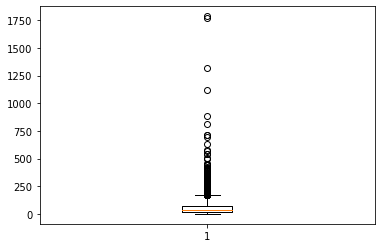

In [24]:
plt.boxplot(customer_unique_item_series.values)
plt.show()

- 총 상품 갯수
- 가장 거래가 많은 상품 top 10 검색
- 상품별 판매수량 분포 탐색
- 거래별 가격 탐색

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ContaintDigit,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,True,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,True,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True,2010-12-01


In [26]:
# 총 상품 갯수
df['StockCode'].nunique()

3660

In [27]:
# 가장 거래가 많은 상품 top10
a1 = df.groupby('StockCode')['InvoiceNo'].nunique()
a2 = a1.sort_values(ascending=False)
a2[:10]

StockCode
85123A    1978
22423     1703
85099B    1600
47566     1379
84879     1375
20725     1289
22720     1146
23203     1080
20727     1052
22383     1043
Name: InvoiceNo, dtype: int64

In [28]:
# 상품별 판매수량 분포 탐색
df1 = df.groupby('StockCode')['Quantity'].sum()
df1.sort_values(ascending=False)

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
          ...  
90024D        1
84613C        1
20892         1
90084         1
47503J        1
Name: Quantity, Length: 3660, dtype: int64

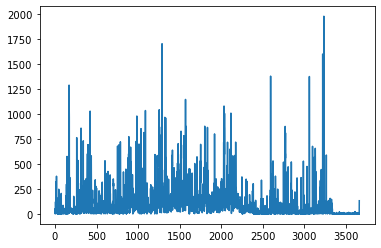

In [29]:
plt.plot(a1.values)
plt.show()

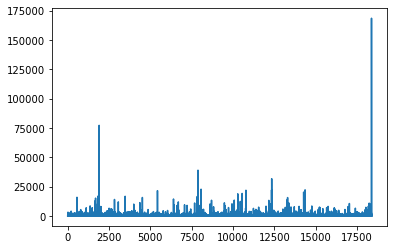

In [30]:
# 거래별 가격 탐색
df['amount'] = df['Quantity'] * df['UnitPrice']
a3 = df.groupby('InvoiceNo')['amount'].sum()

plt.plot(a3.values)
plt.show()


### 구매패턴 분석을 위해 시계열 기준으로 데이터 분리

In [31]:
import datetime

# 2011년 11월을 기준으로 하여, 기준 이전과 이후로 데이터를 분리
df_year_round = df[df['Date'] < datetime.date(2011, 11, 1)]
df_year_end = df[df['Date'] >= datetime.date(2011,11,1)]

print(df_year_round.shape)
print(df_year_end.shape)

(314902, 11)
(81568, 11)


### 분리된 데이터에서 구매 패턴 검색
- 재구매, 신규 구매 등의 여부

In [32]:
# 11월 이전 데이터에서 구매했던 상품의 셋을 추출한다.
# apply(set) : 중복제거
customer_item_round_set = df_year_round.groupby('CustomerID')['StockCode'].apply(set)
print(customer_item_round_set)

CustomerID
12346                                              {23166}
12347    {84969, 85232D, 84625C, 23084, 23421, 22697, 2...
12348    {21211, 21982, 22437, 21725, 22616, 84992, 219...
12350    {22412, 79066K, 84086C, 22348, 20615, 22557, 2...
12352    {22423, 21380, 22120, 22720, 22624, 22701, 220...
                               ...                        
18280    {22084, 22180, 22467, 22725, 22495, 22358, 824...
18281    {23209, 22467, 22716, 23007, 23008, 22028, 22037}
18282    {23187, 21108, 21109, 22089, 22424, 23295, 21270}
18283    {37447, 22469, 23203, 20724, 22975, 22065, 225...
18287    {85039B, 72351B, 22583, 22065, 22807, 23310, 2...
Name: StockCode, Length: 3970, dtype: object


In [33]:
# 11월 이전에 구매한 내역은 old라는 단어를 셋팅해준다.
customer_item_dict = {}

# 11월 이전 구매건 수 만큼 반복한다.
for customer_id, stocks in customer_item_round_set.items():
#     print(customer_id)
#     print(stocks)
#     print('------------------')
    # 딕셔너리에 담는다.
    customer_item_dict[customer_id] = {}
    
    # 현 구매자가 구매한 물품의 수만큼 반복한다.
    for stock_code in stocks:
        customer_item_dict[customer_id][stock_code] = 'old'
    
# 12347번 사용자가 구매한 물품
print(customer_item_dict['12347'])

{'84969': 'old', '85232D': 'old', '84625C': 'old', '23084': 'old', '23421': 'old', '22697': 'old', '22725': 'old', '84992': 'old', '21064': 'old', '22417': 'old', '84559A': 'old', '85178': 'old', '22432': 'old', '47567B': 'old', '20966': 'old', '23174': 'old', '51014C': 'old', '23420': 'old', '23171': 'old', '23297': 'old', '20665': 'old', '23480': 'old', '23146': 'old', '22775': 'old', '22492': 'old', '22371': 'old', '23147': 'old', '20782': 'old', '22773': 'old', '22134': 'old', '85116': 'old', '22698': 'old', '47559B': 'old', '84558A': 'old', '23503': 'old', '23177': 'old', '21041': 'old', '22727': 'old', '22992': 'old', '21791': 'old', '22212': 'old', '23316': 'old', '84559B': 'old', '84997C': 'old', '84997B': 'old', '85167B': 'old', '22945': 'old', '22375': 'old', '23076': 'old', '84991': 'old', '22771': 'old', '22252': 'old', '84997D': 'old', '22621': 'old', '22772': 'old', '21832': 'old', '22726': 'old', '22728': 'old', '23170': 'old', '23175': 'old', '21731': 'old', '47580': 'o

In [34]:
# 11월 이후 데이터에서 구매하는 상품 셋을 구한다.
customer_item_end_set = df_year_end.groupby('CustomerID')['StockCode'].apply(set)
customer_item_end_set

CustomerID
12347    {23508, 21731, 23271, 84625A, 23084, 21064, 23...
12349    {22423, 37500, 22720, 22832, 22554, 22070, 225...
12352    {21669, 23096, 23367, 22668, 23088, 23089, 233...
12356                                       {22423, 21843}
12357    {23315, 22947, 22357, 21485, 20679, 23197, 233...
                               ...                        
18272    {72799C, 72799E, 22965, 23113, 23240, 23494, 2...
18273                                             {79302M}
18274    {22423, 84988, 22720, 21108, 22851, 23243, 845...
18282                  {22423, 23175, 22699, 23174, 22818}
18283    {23203, 20724, 22551, 21982, 23294, 23380, 225...
Name: StockCode, Length: 1904, dtype: object

In [35]:
# 11월 이후에 구매한 고객 수만큼 반복한다.
for customer_id, stocks in customer_item_end_set.items():
#     print(customer_id)
#     print(stocks)
#     print('------------------')
    
    # 11월 이전에 구매한 적이 있는지 확인한다.
    if customer_id in customer_item_dict:
        # 11월 이후에 구매한 상품들의 수만큼 반복한다.
        for stock_code in stocks:
            # 11월 이전에 구매한 적이 있다면
            if stock_code in customer_item_dict[customer_id]:
                customer_item_dict[customer_id][stock_code] = 'both'
            # 11월 이전에 구매한 적이 없다면
            else:
                customer_item_dict[customer_id][stock_code] = 'new'
        
        
    # 11월 이전에 구매내역이 없다면
    else:
        customer_item_dict[customer_id] = {}
        for stock_code in stocks:
            customer_item_dict[customer_id][stock_code] = 'new'

In [36]:
# 각 사용자 별로 old, new, both의 수를 계산해 데이터 프레임으로 생성한다.

# 데이터를 담을 딕셔너리
a1 = {
    'CustomerID' : [],
    'old' : [],
    'new' : [],
    'both' : []
}

# 위에서 구한 딕셔너리 내의 데이터 수만큼 반복한다.
for customer_id in customer_item_dict:
    old = 0
    new = 0
    both = 0
    
    # 해당 사용자내의 딕셔너리의 데이터를 반복해서 가져온다.
    for stock_code in customer_item_dict[customer_id]:
        status = customer_item_dict[customer_id][stock_code]
        # print(status)
        
        if status == 'old':
            old = old+1
        elif status == 'new':
            new = new+1
        elif status == 'both':
            both = both+1
    # print(old, new, both)
    
    # 구한 값을 딕셔너리에 담는다.
    a1['CustomerID'].append(customer_id)
    a1['old'].append(old)
    a1['new'].append(new)
    a1['both'].append(both)
    
# print(a1)

# 데이터 프레임 생성
df_order_info = pd.DataFrame(a1)
df_order_info.head()

,CustomerID,old,new,both
0,12346,1,0,0
1,12347,92,3,8
2,12348,21,0,0
3,12350,16,0,0
4,12352,43,12,2


In [37]:
# 사용자의 수를 가져온다.
df_order_info.shape[0]

4334

In [38]:
# 11월 이후에 새롭게 유입된 고객의 번호를 가져온다.
df_order_info.query('old == 0 and both == 0').index

Int64Index([3970, 3971, 3972, 3973, 3974, 3975, 3976, 3977, 3978, 3979,
            ...
            4324, 4325, 4326, 4327, 4328, 4329, 4330, 4331, 4332, 4333],
           dtype='int64', length=364)

### 상품 구매 예측

In [39]:
# 추천 대상 데이터에 포함되는 유저와 삼품의 개수를 출력한다.
print(len(df_year_round['CustomerID'].unique()))
print(len(df_year_round['StockCode'].unique()))


3970
3608


In [40]:
# 사용자가 각 상품을 얼마나 구매했는지 값을 가져온다.
a1 = df_year_round.groupby(['CustomerID','StockCode'])['InvoiceNo'].nunique()
uir_df = a1.reset_index()
uir_df

,CustomerID,StockCode,InvoiceNo
0,12346,23166,1
1,12347,16008,1
2,12347,17021,1
3,12347,20665,1
4,12347,20719,3
...,...,...,...
220902,18287,84920,1
220903,18287,85039A,2
220904,18287,85039B,2
220905,18287,85040A,1


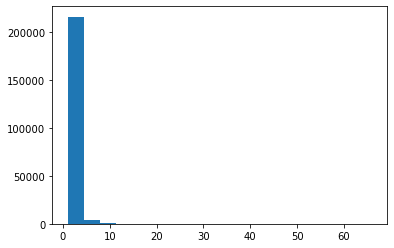

In [41]:
# 재구매수의 분포를 탐색한다.
uir_df['InvoiceNo'].hist(bins='auto', grid=False)
plt.show()

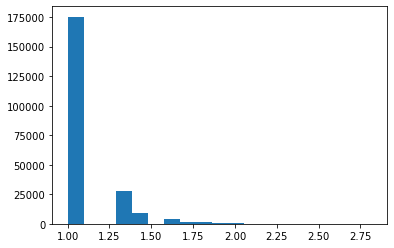

In [42]:
# log 노멀라이징
# 값의 
a1 = uir_df['InvoiceNo'].apply(lambda x : np.log10(x)+1)
a1.hist(bins='auto', grid=False)
plt.show()

In [43]:
# 노멀라이징한 값을 평점으로 사용한다.
uir_df['Rating'] = a1
uir_df

,CustomerID,StockCode,InvoiceNo,Rating
0,12346,23166,1,1.000000
1,12347,16008,1,1.000000
2,12347,17021,1,1.000000
3,12347,20665,1,1.000000
4,12347,20719,3,1.477121
...,...,...,...,...
220902,18287,84920,1,1.000000
220903,18287,85039A,2,1.301030
220904,18287,85039B,2,1.301030
220905,18287,85040A,1,1.000000


In [44]:
# 평점을 1 ~ 5점 사이로 맞춘다.
# 최소값
min_value = uir_df['Rating'].min()

# 최대값
max_value = uir_df['Rating'].max()

print(min_value)
print(max_value)

1.0
2.8195439355418688


In [45]:
# 평점을 계산한다.
uir_df['Rating'] = ((uir_df['Rating'] - min_value) / (max_value - min_value) * 4) + 1
uir_df

,CustomerID,StockCode,InvoiceNo,Rating
0,12346,23166,1,1.000000
1,12347,16008,1,1.000000
2,12347,17021,1,1.000000
3,12347,20665,1,1.000000
4,12347,20719,3,2.048881
...,...,...,...,...
220902,18287,84920,1,1.000000
220903,18287,85039A,2,1.661770
220904,18287,85039B,2,1.661770
220905,18287,85040A,1,1.000000


In [46]:
uir_df['Rating'].describe()

count    220907.000000
mean          1.189098
std           0.411273
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: Rating, dtype: float64

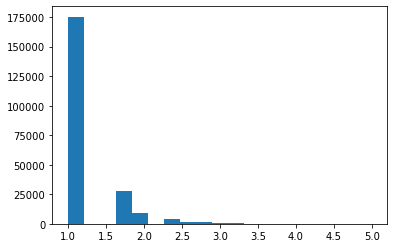

In [47]:
uir_df['Rating'].hist(bins='auto', grid=False)
plt.show()

### 학습한다.

In [48]:
# SVD 모델 학습을 위한 데이터셋을 생성한다.
uir_df = uir_df[['CustomerID', 'StockCode','Rating']]
uir_df.head()

,CustomerID,StockCode,Rating
0,12346,23166,1.000000
1,12347,16008,1.000000
2,12347,17021,1.000000
3,12347,20665,1.000000
4,12347,20719,2.048881


In [49]:
import time
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

In [50]:
# SVD 라이브러리를 사용하기 위한 학습 데이터를 생성한다.
# 대략적인 성능을 알아보기 위해 8:2로 구성한다.
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(uir_df[['CustomerID', 'StockCode','Rating']],reader)
data

In [51]:
# 학습과 검증 데이터로 나눈다,
train_data, test_data = train_test_split(data, test_size=0.2)

In [52]:
# SVD 모델을 학습한다.
# 시작시간
train_start = time.time()

# 모델 생성
model = SVD(n_factors=8, lr_all=0.005, reg_all = 0.02, n_epochs=200)

# 학습
model.fit(train_data)

# 종료시간
train_end = time.time()

print(f'총 학습시간 : {train_end - train_start}')

총 학습시간 : 23.77540636062622


In [53]:
# 예측 정확도를 확인힌다.
pred = model.test(test_data)

# 정확도를 확인힌다.
accuracy.rmse(pred)

RMSE: 0.3337


0.333744186964896

In [54]:
# 11월 이전 전체를 full trainset으로 하여 학습한다.
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(uir_df[['CustomerID', 'StockCode','Rating']],reader)
train_data = data.build_full_trainset()

# 학습
model = SVD(n_factors=8, lr_all=0.005, reg_all = 0.02, n_epochs=200)
model.fit(train_data)

### 상품 추천 시뮬레이션
- 이전에 구매하지 않았던 상품 추천
- 이전에 구매했던 상품 다시 추천
- 전체 상품을 대상으로 하여 추천

#### 이전에 구매하지 않았던 상품 추천

In [68]:
# 이전에 구매하지 않았던 상품 추천
test_data = train_data.build_anti_testset()
target_user_pred = model.test(test_data)
# target_user_pred

In [69]:
# 위에서 얻은 결과를 딕셔너리 형태로 만든다.
new_order_pred_dict = {}

for customer_id, stock_code, _, pred_rating, _ in target_user_pred:
#     print(customer_id, stock_code, pred_rating)
#     print('-'*40)

    # 사용자 id가 딕셔너리에 이미 있다면
    if customer_id in new_order_pred_dict:
        # 해당 상품이 이미 저장되어 있다면 pass
        if stock_code in new_order_pred_dict[customer_id]:
            pass
        # 해당상품이 사용에 없다면 저장
        else:
            new_order_pred_dict[customer_id]
    
    
    # 사용자 id가 딕셔너리에 없다면
    else:
        new_order_pred_dict[customer_id] = {}
        new_order_pred_dict[customer_id][stock_code] = pred_rating

In [70]:
# 내용이 너무 많아 문자열로 변환해서 일부분만 확인해보기
str(new_order_pred_dict)[:296]

"{'12346': {'16008': 1}, '12347': {'23166': 1.341878930911489}, '12348': {'23166': 1}, '12350': {'23166': 1}, '12352': {'23166': 1.1447169016933039}, '12353': {'23166': 1.0779478681342853}, '12354': {'23166': 1}, '12355': {'23166': 1}, '12356': {'23166': 1.0488209803594146}, '12358': {'23166': 1}"

In [66]:
# 사용자의 수만큼 반복한다.
for customer_id in new_order_pred_dict:
    # 해당 사용자에 대한 정보를 가져온다.
    a1 = new_order_pred_dict[customer_id]
    
    # 가져온 정보를 Series로 생성한다,
    a2 = pd.Series(a1)
    
    # 예측 평점을 기준으로 내림 차순 정렬한다.
    a3 = a2.sort_values(ascending=False)
    
    # 상위 5개만 가져와 출력한다.
    # print(f'{customer_id} : {a3[:5].index.tolist()}')

#### 이전에 구매했던 상품 추천

In [72]:
# 이전에 구매했던 상품을 대상으로 예측한다.
test_data = train_data.build_testset()
target_user_predictions = model.test(test_data)


In [73]:
# 위에서 얻은 결과를 딕셔너리 행태로 만든다..
new_order_prediction_dict = {}

for customer_id, stock_code, _, prediction_rating, _ in target_user_predictions :
    # print(customer_id, stock_code, prediction_rating)
    # 사용자 id가 딕셔너리에 이미 있다면
    if customer_id in new_order_prediction_dict :
        # 해당 상품이 이미 저장되어 있다면 pass
        if stock_code in new_order_prediction_dict[customer_id] :
            pass
        else :
            # 해당 상품이 해당 사용에 없다면 저장한다.
            new_order_prediction_dict[customer_id][stock_code] = prediction_rating
    # 사용자 id가 딕셔너리에 없다면
    else :
        new_order_prediction_dict[customer_id] = {}
        new_order_prediction_dict[customer_id][stock_code] = prediction_rating


In [74]:
str(new_order_prediction_dict)[:300]


"{'12346': {'23166': 1.041701004824016}, '12347': {'16008': 1.2548492938308997, '17021': 1, '20665': 1.1010507883866758, '20719': 1.7728387678064115, '20780': 1.044987893718041, '20782': 1.1829342195601227, '20966': 1, '21035': 1.3758748156129137, '21041': 1.8039369241545067, '21064': 1.3294742873781"

In [77]:
# 사용자의 수만큼 반복한다.
for customer_id in new_order_prediction_dict:
    # 해당 사용자에 대한 정보를 가져온다.
    a1 = new_order_prediction_dict[customer_id]
    
    # 가져온 정보를 Series로 생성한다,
    a2 = pd.Series(a1)
    
    # 예측 평점을 기준으로 내림 차순 정렬한다.
    a3 = a2.sort_values(ascending=False)
    
    # 상위 5개만 가져와 출력한다.
    # print(f'{customer_id} : {a3[:5].index.tolist()}')